# 第3章 数据预处理

## 3.1 非数值类型数据处理

### 3.1.1 Get_dummies哑变量处理

**1. 简单示例：“男”和“女”的数值转换**

In [2]:
import pandas as pd
df = pd.DataFrame({'客户编号': [1, 2, 3], '性别': ['男', '女', '男']})
df

,客户编号,性别
0,1,男
1,2,女
2,3,男


In [3]:
df = pd.get_dummies(df, columns=['性别'])
df

,客户编号,性别_女,性别_男
0,1,0,1
1,2,1,0
2,3,0,1


In [4]:
df = df.drop(columns='性别_女') 

In [5]:
df

,客户编号,性别_男
0,1,1
1,2,0
2,3,1


In [6]:
df = df.rename(columns={'性别_男':'性别'})
df

,客户编号,性别
0,1,1
1,2,0
2,3,1


**2. 稍复杂点的案例：房屋朝向的数值转换**

In [7]:
import pandas as pd
df = pd.DataFrame({'房屋编号': [1, 2, 3, 4, 5], '朝向': ['东', '南', '西', '北', '南']})
df

,房屋编号,朝向
0,1,东
1,2,南
2,3,西
3,4,北
4,5,南


In [8]:
df = pd.get_dummies(df, columns=['朝向'])
df

,房屋编号,朝向_东,朝向_北,朝向_南,朝向_西
0,1,1,0,0,0
1,2,0,0,1,0
2,3,0,0,0,1
3,4,0,1,0,0
4,5,0,0,1,0


In [9]:
df = df.drop(columns='朝向_西') 

In [10]:
df

,房屋编号,朝向_东,朝向_北,朝向_南
0,1,1,0,0
1,2,0,0,1
2,3,0,0,0
3,4,0,1,0
4,5,0,0,1


### 3.1.2 Label Encoding编号处理

In [11]:
import pandas as pd
df = pd.DataFrame({'编号': [1, 2, 3, 4, 5], '城市': ['北京', '上海', '广州', '深圳', '北京']})

In [12]:
df

,编号,城市
0,1,北京
1,2,上海
2,3,广州
3,4,深圳
4,5,北京


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['城市'])

In [14]:
print(label)

[1 0 2 3 1]


In [15]:
df

,编号,城市
0,1,北京
1,2,上海
2,3,广州
3,4,深圳
4,5,北京


In [15]:
df['城市'] = label

In [16]:
df

,编号,城市
0,1,1
1,2,0
2,3,2
3,4,3
4,5,1


**补充知识点：pandas库中的replace()函数**

In [17]:
df = pd.DataFrame({'编号': [1, 2, 3, 4, 5], '城市': ['北京', '上海', '广州', '深圳', '北京']})

In [18]:
df['城市'].value_counts()

北京    2
上海    1
广州    1
深圳    1
Name: 城市, dtype: int64

In [19]:
df['城市'] = df['城市'].replace({'北京': 0, '上海': 1, '广州': 2, '深圳':3})
df

,编号,城市
0,1,0
1,2,1
2,3,2
3,4,3
4,5,0


总结来说，Get_dummies的优点就是它的值只有0和1，缺点是当类别的数量很多时，特征维度会很高，我们可以配合使用下一章即将讲到的PCA主成分分析来减少维度。所以如果Get_dummies类别数目不多时可以优先考虑，其次考虑Label Encoding或replace()函数，但如果是基于树模型的机器学习模型，则是用Label Encoding编号处理则没有太大关系。

## 3.2 重复值、缺失值及异常值处理

### 3.2.1 重复值处理

In [20]:
# 这里首先创建一个含有重复值的DataFrame，代码如下：
import pandas as pd
data = pd.DataFrame([[1, 2, 3], [1, 2, 3], [4, 5, 6]], columns=['c1', 'c2', 'c3'])

In [21]:
# 此时的data二维列表如下所示，可以看到第一行和第二行是重复的。
data

,c1,c2,c3
0,1,2,3
1,1,2,3
2,4,5,6


In [22]:
# 如果数据量较大，我们可以通过duplicated()函数来查询重复的内容，代码如下：
data[data.duplicated()]

,c1,c2,c3
1,1,2,3


In [23]:
# 如果想统计重复行的数量，可以通过sum()函数进行查看，代码如下，本案例结果为1。
data.duplicated().sum()

1

In [24]:
# 发现有重复行的时候，可以通过drop_duplicates()函数删除重复行，代码如下：
data = data.drop_duplicates()

In [25]:
data

,c1,c2,c3
0,1,2,3
2,4,5,6


In [27]:
# 如果想按列进行去重，比如说如果c1列出现相同的内容，就把那行代码删掉，可以采用如下代码。这样的筛选条件则不如之前要全部一样才删除严格。
data = pd.DataFrame([[1, 2, 3], [1, 2, 3], [4, 5, 6]], columns=['c1', 'c2', 'c3'])
data = data.drop_duplicates('c1')
data

,c1,c2,c3
0,1,2,3
2,4,5,6


### 3.2.2 缺失值处理

In [31]:
# 这里先构造一个含有缺失值的DataFrame，代码如下：
import numpy as np
data = pd.DataFrame([[1, np.nan, 3], [np.nan, 2, np.nan], [1, np.nan, 0]], columns=['c1', 'c2', 'c3'])
data

,c1,c2,c3
0,1.0,NaN,3.0
1,NaN,2.0,NaN
2,1.0,NaN,0.0


In [32]:
# 可以用isnull()函数或isna()函数（两者作用类似）来查看空值，代码如下：
data.isnull()  # 或者写data.isna()

,c1,c2,c3
0,False,True,False
1,True,False,True
2,False,True,False


In [33]:
# 也可以对单列查看缺失值情况，代码如下：
data['c1'].isnull()

0    False
1     True
2    False
Name: c1, dtype: bool

In [34]:
# 如果数据量较大，可以通过如下代码筛选某列内容为空值的行，代码如下：
data[data['c1'].isnull()]

,c1,c2,c3
1,NaN,2.0,NaN


In [35]:
# 对于空值有两种常见的处理方式：删除空值和填补空值。
# 通过dropna()函数可以删除空值，代码如下：
a = data.dropna()
a

,c1,c2,c3


In [36]:
# 如果觉得该删除方法过于激进，可以设置thresh参数，比如将其设置为n，那么其含义是如果该行的非空值少于n个则删除该行，演示代码如下：
a = data.dropna(thresh=2)
a

,c1,c2,c3
0,1.0,NaN,3.0
2,1.0,NaN,0.0


In [37]:
# 通过finllna()函数可以填补空值，这里采用的是均值填充法，通过每一列的均值对该列的空值进行填充，也可以把其中的data.mean()换成data.meian()则变为中位数填充。
b = data.fillna(data.mean())
b

,c1,c2,c3
0,1.0,2.0,3.0
1,1.0,2.0,1.5
2,1.0,2.0,0.0


In [38]:
# 此处method='pad'代表用缺失值所在列的前一个值填充，如果前一个值不存在或也缺失，则结果不变。运行结果如下：
c = data.fillna(method='pad')
c

,c1,c2,c3
0,1.0,NaN,3.0
1,1.0,2.0,3.0
2,1.0,2.0,0.0


In [39]:
# 还可以采用method='backfill'或method='bfill'用缺失值所在列的后一个值填充，如果后一个值不存在或也缺失，则结果不变。
d = data.fillna(method='backfill')
e = data.fillna(method='bfill')
e

,c1,c2,c3
0,1.0,2.0,3.0
1,1.0,2.0,0.0
2,1.0,NaN,0.0


### 3.2.3 异常值处理

In [41]:
# 这里先构造一个含有异常值的数据集：
data = pd.DataFrame({'c1': [3, 10, 5, 7, 1, 9, 69], 'c2': [15, 16, 14, 100, 19, 11, 8], 'c3': [20, 15, 18, 21, 120, 27, 29]}, columns=['c1', 'c2', 'c3'])
data

,c1,c2,c3
0,3,15,20
1,10,16,15
2,5,14,18
3,7,100,21
4,1,19,120
5,9,11,27
6,69,8,29


可以看到第一列的数字69，第二列的数字100，第三列的数字120为比较明显的异常值，那么该如何利用Python来进行异常值的检测呢？下面我们主要通过两种方法来进行检测：利用箱体图观察和利用标准差检测。

**1. 利用箱型图观察**

In [42]:
%matplotlib inline

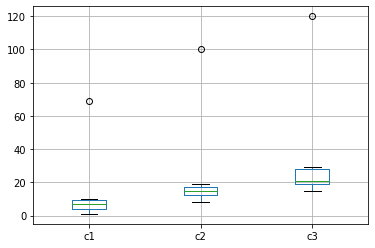

In [43]:
data.boxplot()  # 画箱型图

**2. 利用标准差检测**

In [45]:
a = pd.DataFrame()
for i in data.columns:
    z = (data[i] - data[i].mean()) / data[i].std()
    a[i] = abs(z) > 2

In [46]:
a

,c1,c2,c3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,True
5,False,False,False
6,True,False,False


## 3.3 数据标准化

In [47]:
# 构造数据
import pandas as pd
X = pd.DataFrame({'酒精含量(%)': [50, 60, 40, 80, 90], '苹果酸含量(%)': [2, 1, 1, 3, 2]})
y = [0, 0, 0, 1, 1]

X  # 查看X

,酒精含量(%),苹果酸含量(%)
0,50,2
1,60,1
2,40,1
3,80,3
4,90,2


### 3.3.1 min-max标准化

In [48]:
from sklearn.preprocessing import MinMaxScaler
X_new = MinMaxScaler().fit_transform(X)

print(X_new)  # 查看X_new

[[0.2 0.5]
 [0.4 0. ]
 [0.  0. ]
 [0.8 1. ]
 [1.  0.5]]


其中第一列为酒精含量归一化后的值，第二列为苹果酸含量归一化后的值，可以看到它们都属于[0,1]了。在实际应用中，通常将所有数据都归一化后，再进行训练集和测试集划分，演示代码如下：

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=123)

### 3.3.2 Z-score标准化

In [50]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)

print(X_new)  # 查看X_new

[[-0.75482941  0.26726124]
 [-0.21566555 -1.06904497]
 [-1.29399328 -1.06904497]
 [ 0.86266219  1.60356745]
 [ 1.40182605  0.26726124]]


## 3.4 数据分箱

In [51]:
import pandas as pd
data = pd.DataFrame([[22,1],[25,1],[20,0],[35,0],[32,1],[38,0],[50,0],[46,1]], columns=['年龄', '是否违约'])
data

,年龄,是否违约
0,22,1
1,25,1
2,20,0
3,35,0
4,32,1
5,38,0
6,50,0
7,46,1


In [52]:
# 通过如下代码即可进行等宽数据分箱：
data_cut = pd.cut(data['年龄'], 3)
print(data_cut)

0    (19.97, 30.0]
1    (19.97, 30.0]
2    (19.97, 30.0]
3     (30.0, 40.0]
4     (30.0, 40.0]
5     (30.0, 40.0]
6     (40.0, 50.0]
7     (40.0, 50.0]
Name: 年龄, dtype: category
Categories (3, interval[float64, right]): [(19.97, 30.0] < (30.0, 40.0] < (40.0, 50.0]]


In [56]:
# 通过groupby()函数进行分组，count()函数（详见14.3节补充知识点）进行计数可以获取每个分箱中的样本数目，代码如下：
data['年龄'].groupby(data_cut).count()

年龄
(19.97, 30.0]    3
(30.0, 40.0]     3
(40.0, 50.0]     2
Name: 年龄, dtype: int64

In [57]:
# 补充知识点，分箱并进行编号
print(pd.cut(data['年龄'], 3, labels=[1, 2, 3]))

0    1
1    1
2    1
3    2
4    2
5    2
6    3
7    3
Name: 年龄, dtype: category
Categories (3, int64): [1 < 2 < 3]
